# 통계분석 과제 (ANOVA)
## One -Way ANOVA 
- titanic 데이터에서 class에 따른 평균 fare의 차이가 있는지를 검정하세요 


In [1]:
import pandas as pd 
df_t = pd.read_csv('./data/titanic.csv')

In [3]:
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg


In [4]:
# 정규성 검증

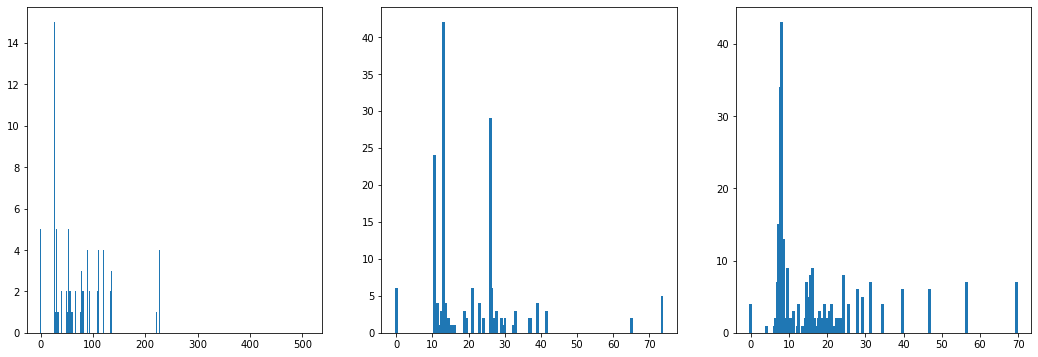

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3,figsize=(18,6))
data = df_t[df_t['class']=='First'].fare.value_counts()
ax[0].bar(data.index, data.values)
data = df_t[df_t['class']=='Second'].fare.value_counts()
ax[1].bar(data.index, data.values)
data = df_t[df_t['class']=='Third'].fare.value_counts()
ax[2].bar(data.index, data.values)
plt.show()

In [35]:
from scipy.stats import shapiro

shapiro(df_t[df_t['class']=='First'].fare),shapiro(df_t[df_t['class']=='Second'].fare),shapiro(df_t[df_t['class']=='Third'].fare)

(ShapiroResult(statistic=0.718401312828064, pvalue=7.556354866266318e-19),
 ShapiroResult(statistic=0.7785055637359619, pvalue=2.1134516002102284e-15),
 ShapiroResult(statistic=0.6183854937553406, pvalue=1.5995106796893175e-31))

In [41]:
## 3개의 pvalue가 유의수준보다 낮으므로, class 3 범주의 fare 변수들은 모두 정규성 가설을 기각한다

In [42]:
# 정규성이 없으므로 kruskal 검정으로 anova 실행

In [52]:
import scipy.stats as stats

#help(stats.kruskal)
stats.kruskal(df_t[df_t['class']=='First'].fare,
              df_t[df_t['class']=='Second'].fare,
              df_t[df_t['class']=='Third'].fare)

KruskalResult(statistic=438.0437034212556, pvalue=7.586096900646798e-96)

In [53]:
## H0 기각함. 따라서 class에 따라 fare 차이가 유의미하다.

In [64]:
# 사후 검정 튜키 비교
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data= df_t['fare'], groups=df_t['class'] )
tuekeyhsd = mc.tukeyhsd()
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
First,Second,-63.4925,0.001,-72.9167,-54.0683,True
First,Third,-70.4791,0.001,-78.1491,-62.8092,True
Second,Third,-6.9866,0.1081,-15.1066,1.1333,False


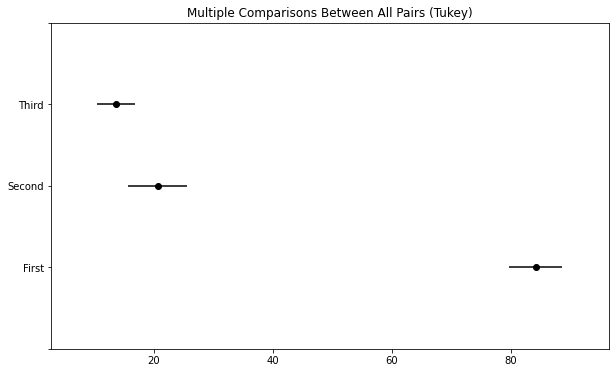

In [66]:
## 사후검정 결과
# fare(class==Second) < fare(class==First) 이고,
# fare(class==Third) < fare(class=First) 이고,
# fare(class==Second) = fare(class==Third)라는 귀무가설은 기각하지 못한다.
fig = tuekeyhsd.plot_simultaneous()


## Two -Way ANOVA 
- titanic 데이터에서 class와 sex에 따른 fare의 차이를 검정하세요. 
- 1. 교호작용효과 검정 
- 2. class효과 검정 
- 3. sex 효과 검정 

In [87]:
# 정규성 검정

In [93]:
class_ = df_t['class']
sex_ = df_t['sex']
fare_ = df_t['fare']

In [68]:
shapiro(df_t[df_t['class']=='First'].fare),shapiro(df_t[df_t['class']=='Second'].fare),shapiro(df_t[df_t['class']=='Third'].fare),

(ShapiroResult(statistic=0.718401312828064, pvalue=7.556354866266318e-19),
 ShapiroResult(statistic=0.7785055637359619, pvalue=2.1134516002102284e-15),
 ShapiroResult(statistic=0.6183854937553406, pvalue=1.5995106796893175e-31))

In [70]:
shapiro(df_t[df_t['sex']=='male'].fare),shapiro(df_t[df_t['sex']=='female'].fare)

(ShapiroResult(statistic=0.43366360664367676, pvalue=5.159334317114255e-39),
 ShapiroResult(statistic=0.6361145973205566, pvalue=2.580287846596769e-25))

In [75]:
## 모두 정규성이 있다는 귀무가설을 기각하기 때문에 정규성이 없다고 볼 수 있음 (two way anova 실습 진행을 위해 일단, 정규성 만족한다고 하자?)

In [72]:
stats.levene(df_t[df_t['class']=='First'].fare,df_t[df_t['class']=='Second'].fare,df_t[df_t['class']=='Third'].fare)

LeveneResult(statistic=118.57020037111805, pvalue=2.288618662046418e-46)

In [73]:
stats.levene(df_t[df_t['sex']=='male'].fare,df_t[df_t['sex']=='female'].fare)

LeveneResult(statistic=19.188225990910503, pvalue=1.3255194429754062e-05)

In [76]:
## 등분산성 불만족

In [91]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'fare ~ C(class_)*C(sex_)'
model = ols(formula, df_t).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(class_),7.347122e+05,2.0,242.620968,9.763645e-85
C(sex_),3.174857e+04,1.0,20.968394,5.337586e-06
C(class_):C(sex_),5.002816e+04,2.0,16.520591,9.034206e-08
Residual,1.339992e+06,885.0,NaN,NaN


In [92]:
# 1.class와 sex 교호작용 pvalue가 유의수준 이하로, 귀무가설을 기각하여, fare에 대해 class*sex 변수가 교호작용이 있다고 볼 수 있음
# 2.class의 pvalue가 유의수준 이하로, class변수에 따라 fare가 유의하게 다름
# 3.sex의 pvalue가 유의수준 이하로, sex변수에 따라 fare가 유의하게 다름

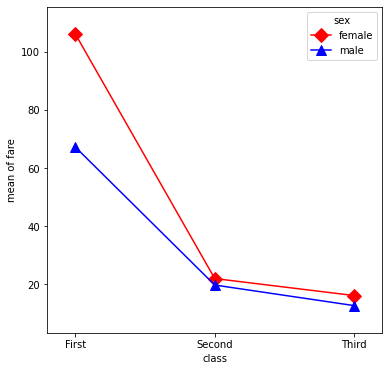

In [94]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(class_,sex_, fare_, # 매개변수 순서가 중요함, x1, x2, y
                       colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)